# Movie Industry Recommendations

**By:** Lauren Esser

**Blog post URL:** https://lauren-esser.github.io/data_visualizations_the_when_and_how

This is my Module One Project for the Flatiron Data Science Bootcamp.


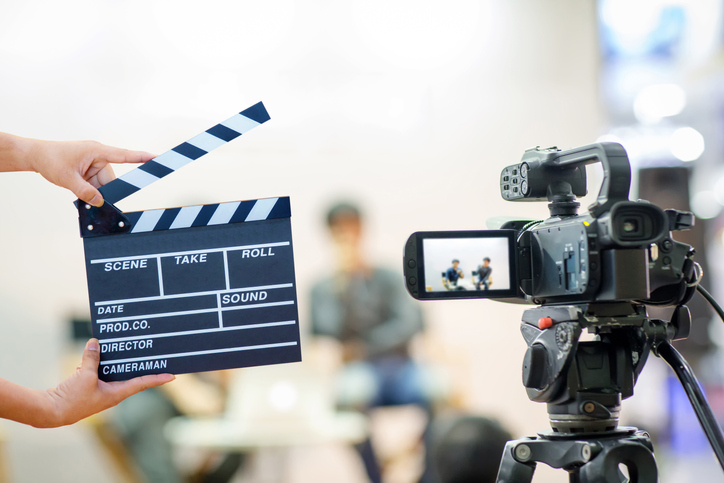

# Business Value

The goal of this notebook is to provide Microsoft with advice on how to enter the movie industry. The business value behind this is that it expands Microsoft's business into a very lucrative sector of the market. In 2018 alone, 1.3 billion movie tickets were sold at North American box offices. Disney who is the leading film study in North America made a domestic box office gross of 3.8 billion dollars in 2019. If Microsoft is able to learn from another companies success and act on it, they have potential to grow their business even more.

# Introduction:
This notebook was created to assist Microsoft in better understanding the movie industry and aid in translating those points into actionable insights that can be used in choosing which types of films to create. Data in this notebook was taken from [IMDb](https://datasets.imdbws.com/), an online database that is known for its information on films including directors, ratings, revenue, etc. 
The three main questions I focused on for Microsoft are as follows:

>**1. Which director makes the highest domestic and world wide gross?**

>**2. Which genre makes the highest domestic and world wide gross?**

>**3. Does runtime have an impact on ratings?**
    
    
These three questions were thoughtfully chosen as important aspects to what makes a movie great. Below you will find markdowns explaining the code and EDA.

# Obtain Data

To replicate this notebook please download the [IMDb Data Set](https://datasets.imdbws.com/) and upload them into your JupyterNotebook under a file titled zippedData. Specific information on the datasets can be found [here](https://www.imdb.com/interfaces/). This information includes data types, columns, and information within each data table. 

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import glob
from pandasql import sqldf
import numpy as np
import plotly.express as px

In /Users/laurenesser/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/laurenesser/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/laurenesser/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/laurenesser/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and wi

In [2]:
#remove letters before/after: *sv*
file_list = glob.glob('zippedData/*sv*')
file_list

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/new.title.crew.tsv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/new.title.ratings.tsv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/new.title.basics.tsv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [3]:
#save tables into a dict
TABLES = {}
for file in file_list:
    #encoding = latin-1 for .tsv
    if file.endswith('.tsv.gz'):
        df = pd.read_csv(file, sep="\t", encoding = 'latin-1')
    else:
        df = pd.read_csv(file)
        
    #strip excess words
    TABLES[file.strip("zippedData/")] = df
    display(df.head().style.set_caption(file.strip("zippedData/")))

/Users/laurenesser/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.



Within the Obtain section of my notebook, I uploaded the zipped data files taken from IMDb. By using set_caption I was able to preview the head of each table with the table title labeled in light grey. This allowed me to take a first glimpse at my data. 

# Scrub

### IMDB Basics

In [4]:
#assign variable
imdb_tbasics = TABLES['new.title.basics.tsv.g']


imdb_tbasics.info()
print("Shape of IMDb Basics:", imdb_tbasics.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7023997 entries, 0 to 7023996
Data columns (total 9 columns):
tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           int64
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtypes: int64(1), object(8)
memory usage: 482.3+ MB
Shape of IMDb Basics: (7023997, 9)


In [5]:
#check null values
imdb_tbasics.isna().sum()

tconst             0
titleType          0
primaryTitle      10
originalTitle     10
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            13
dtype: int64

In [6]:
imdb_tbasics.head()

tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

   isAdult startYear endYear runtimeMinutes                    genres  
0        0      1894      \N              1         Documentary,Short  
1        0      1892      \N              5           Animation,Short  
2        0      1892      \N              4  Animation,Comedy,Romance  
3        0      1892      \N             12           Animation,Short  
4        0      1893      \N              1              Comedy,Short

### IMDB Ratings

In [8]:
imdb_ratings = TABLES['new.title.ratings.tsv.g']
imdb_ratings.info()
print("Shape of IMDb Ratings:", imdb_ratings.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058736 entries, 0 to 1058735
Data columns (total 3 columns):
tconst           1058736 non-null object
averageRating    1058736 non-null float64
numVotes         1058736 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 24.2+ MB
Shape of IMDb Ratings: (1058736, 3)


In [9]:
imdb_ratings['averageRating'].nunique

<bound method IndexOpsMixin.nunique of 0          5.7
1          6.1
2          6.5
3          6.2
4          6.1
          ... 
1058731    7.2
1058732    6.6
1058733    5.9
1058734    6.9
1058735    7.3
Name: averageRating, Length: 1058736, dtype: float64>

In [10]:
#check nulls
imdb_ratings.isna().sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

In [11]:
imdb_ratings.head()

tconst  averageRating  numVotes
0  tt0000001            5.7      1635
1  tt0000002            6.1       198
2  tt0000003            6.5      1326
3  tt0000004            6.2       120
4  tt0000005            6.1      2110

### IMDB Directors

In [13]:
directors = TABLES['new.title.crew.tsv.g']

directors.info()
print("Shape of Directors:", directors.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7023997 entries, 0 to 7023996
Data columns (total 3 columns):
tconst       object
directors    object
writers      object
dtypes: object(3)
memory usage: 160.8+ MB
Shape of Directors: (7023997, 3)


In [14]:
#check nulls
directors.isna().sum()

tconst       0
directors    0
writers      0
dtype: int64

In [15]:
directors.head()

tconst  directors writers
0  tt0000001  nm0005690      \N
1  tt0000002  nm0721526      \N
2  tt0000003  nm0721526      \N
3  tt0000004  nm0721526      \N
4  tt0000005  nm0005690      \N

### IMDB Director Names

In [16]:
Names = TABLES['mdb.name.basics.csv.g']

Names.info()
print("Shape of Names:", Names.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB
Shape of Names: (606648, 6)


In [17]:
Names.head()

nconst       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   
1  nm0061865       Joseph Bauer         NaN         NaN   
2  nm0062070         Bruce Baum         NaN         NaN   
3  nm0062195       Axel Baumann         NaN         NaN   
4  nm0062798        Pete Baxter         NaN         NaN   

                                 primary_profession  \
0         miscellaneous,production_manager,producer   
1        composer,music_department,sound_department   
2                        miscellaneous,actor,writer   
3  camera_department,cinematographer,art_department   
4  production_designer,art_department,set_decorator   

                          known_for_titles  
0  tt0837562,tt2398241,tt0844471,tt0118553  
1  tt0896534,tt6791238,tt0287072,tt1682940  
2  tt1470654,tt0363631,tt0104030,tt0102898  
3  tt0114371,tt2004304,tt1618448,tt1224387  
4  tt0452644,tt0452692,tt3458030,tt2178256

### Cleaning IMDB Basics

In [18]:
#dropping NA rows in primarytitle, originaltitle, genre
imdb_tbasics.dropna(inplace = True)
imdb_tbasics.isna().sum()

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
dtype: int64

In [19]:
imdb_tbasics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7023974 entries, 0 to 7023996
Data columns (total 9 columns):
tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           int64
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtypes: int64(1), object(8)
memory usage: 535.9+ MB


In [20]:
#check for extraneous values
for col in imdb_tbasics.columns:
    print(col, '\n', imdb_tbasics[col].value_counts(normalize=True).head(), '\n\n')

tconst 
 tt8524796     1.423695e-07
tt0893128     1.423695e-07
tt10024640    1.423695e-07
tt1765361     1.423695e-07
tt10888062    1.423695e-07
Name: tconst, dtype: float64 


titleType 
 tvEpisode    0.715937
short        0.107113
movie        0.079276
video        0.038938
tvSeries     0.026909
Name: titleType, dtype: float64 


primaryTitle 
 Episode #1.1    0.005148
Episode #1.2    0.004682
Episode #1.3    0.004415
Episode #1.4    0.003962
Episode #1.5    0.003623
Name: primaryTitle, dtype: float64 


originalTitle 
 Episode #1.1    0.005148
Episode #1.2    0.004682
Episode #1.3    0.004415
Episode #1.4    0.003962
Episode #1.5    0.003623
Name: originalTitle, dtype: float64 


isAdult 
 0    0.969247
1    0.030753
Name: isAdult, dtype: float64 


startYear 
 \N      0.081152
2017    0.052702
2018    0.052317
2016    0.050384
2015    0.048097
Name: startYear, dtype: float64 


endYear 
 \N      0.990954
2017    0.000649
2018    0.000579
2019    0.000506
2016    0.000497
Name: endYe

In [21]:
#save imdb_tbasics to only have movies
imdb_tbasics = imdb_tbasics[imdb_tbasics['titleType'] == 'movie']

In [22]:
#check that it worked
for col in imdb_tbasics.columns:
    print(col, '\n', imdb_tbasics[col].value_counts(normalize=True).head(), '\n\n')

tconst 
 tt0306249    0.000002
tt0170709    0.000002
tt0445421    0.000002
tt1941569    0.000002
tt6287974    0.000002
Name: tconst, dtype: float64 


titleType 
 movie    1.0
Name: titleType, dtype: float64 


primaryTitle 
 Home      0.000099
Alone     0.000079
Mother    0.000079
Broken    0.000075
Hamlet    0.000072
Name: primaryTitle, dtype: float64 


originalTitle 
 Home        0.000088
Broken      0.000074
Hamlet      0.000065
Alone       0.000059
Blackout    0.000057
Name: originalTitle, dtype: float64 


isAdult 
 0    0.984176
1    0.015824
Name: isAdult, dtype: float64 


startYear 
 \N      0.116985
2017    0.032897
2016    0.032206
2018    0.031882
2015    0.030108
Name: startYear, dtype: float64 


endYear 
 \N    1.0
Name: endYear, dtype: float64 


runtimeMinutes 
 \N    0.365542
90    0.043712
80    0.019026
85    0.018110
60    0.017682
Name: runtimeMinutes, dtype: float64 


genres 
 Drama          0.179841
Documentary    0.139398
\N             0.126223
Comedy      

In [23]:
#check for duplicates
duplicates = imdb_tbasics[imdb_tbasics.duplicated()]
print(len(duplicates))
duplicates.head()

0


Empty DataFrame
Columns: [tconst, titleType, primaryTitle, originalTitle, isAdult, startYear, endYear, runtimeMinutes, genres]
Index: []

In [24]:
#drop \\N from runtimeMinutes
imdb_tbasics.drop(imdb_tbasics.loc[imdb_tbasics['runtimeMinutes']=='\\N'].index, inplace=True)

/Users/laurenesser/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
imdb_tbasics.isna().sum()

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
dtype: int64

In [26]:
imdb_tbasics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353285 entries, 8 to 7023947
Data columns (total 9 columns):
tconst            353285 non-null object
titleType         353285 non-null object
primaryTitle      353285 non-null object
originalTitle     353285 non-null object
isAdult           353285 non-null int64
startYear         353285 non-null object
endYear           353285 non-null object
runtimeMinutes    353285 non-null object
genres            353285 non-null object
dtypes: int64(1), object(8)
memory usage: 27.0+ MB


### Clean IMDB Ratings

In [27]:
#check for null values
imdb_ratings.isna().sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

In [28]:
#check for extraneous values
for col in imdb_ratings.columns:
    print(col, '\n', imdb_ratings[col].value_counts(normalize=True).head(), '\n\n')

tconst 
 tt10291938    9.445225e-07
tt0111689     9.445225e-07
tt0854912     9.445225e-07
tt1013099     9.445225e-07
tt1761007     9.445225e-07
Name: tconst, dtype: float64 


averageRating 
 7.2    0.035762
7.8    0.034281
7.6    0.034200
7.0    0.034034
7.4    0.033521
Name: averageRating, dtype: float64 


numVotes 
 5    0.075916
6    0.066561
7    0.055324
8    0.045459
9    0.038925
Name: numVotes, dtype: float64 




In [29]:
#check for duplicates
duplicates = imdb_ratings[imdb_ratings.duplicated(subset='tconst')]
print(len(duplicates))
duplicates.head()

0


Empty DataFrame
Columns: [tconst, averageRating, numVotes]
Index: []

In [30]:
#drop any tconst that has less than 5000 reviews
imdb_ratings = imdb_ratings.loc[(imdb_ratings['numVotes']) > 1000]

In [31]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56531 entries, 0 to 1058461
Data columns (total 3 columns):
tconst           56531 non-null object
averageRating    56531 non-null float64
numVotes         56531 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


### Cleaning IMDB Directors

In [32]:
directors.head()

tconst  directors writers
0  tt0000001  nm0005690      \N
1  tt0000002  nm0721526      \N
2  tt0000003  nm0721526      \N
3  tt0000004  nm0721526      \N
4  tt0000005  nm0005690      \N

In [33]:
#split directors column so that each director is sep.
directors['directors'] = directors['directors'].str.split(',')

In [34]:
#explode sep directors back into table
directors = directors.explode('directors')

> In the above two cells I separated the directors out. I noticed that in any film where there was multiple directors that they were listed together. By splitting and exploding I was able to see each directors movies separately. 

In [35]:
#looked at tconst since there should be duplicate directors
duplicates = directors[directors.duplicated(subset='tconst')]
print(len(duplicates))
duplicates.head()

1292383


tconst  directors writers
6   tt0000007  nm0374658      \N
11  tt0000012  nm0525908      \N
16  tt0000017  nm0804434      \N
28  tt0000030  nm0666972      \N
87  tt0000089  nm0698645      \N

In [36]:
#check extraneous values
for col in directors.columns:
    print(col, '\n', directors[col].value_counts(normalize=True).head(), '\n\n')

tconst 
 tt0441074     0.000054
tt0486531     0.000053
tt4952142     0.000051
tt0806910     0.000041
tt11886912    0.000039
Name: tconst, dtype: float64 


directors 
 \N           0.349910
nm1966600    0.001462
nm1667633    0.001026
nm0554045    0.000809
nm0051678    0.000808
Name: directors, dtype: float64 


writers 
 \N                     0.430391
nm6352729              0.001312
nm3064446,nm3052538    0.001282
nm0555609              0.001065
nm1879108,nm1876156    0.001013
Name: writers, dtype: float64 




In [37]:
#drop \\N from directors
directors.drop(directors.loc[directors['directors']=='\\N'].index, inplace=True)

## Upload Scraped Table on Gross Income
###### Scrape comes from class group effort led by Sam Stoltenberg -  - [github.com/skelouse](https://github.com/skelouse/dsc-mod-1-project-v2-1-onl01-dtsc-ft-070620) Notebook with code in my repro  under `"Sam's code.ipynb"`


In [38]:
#import dataset
income = pd.read_csv('Test/budget_ratings.csv')

In [39]:
#check nulls/shape
print("Check Nulls:", income.isna().sum())
print("Shape:", income.shape)

Check Nulls: Unnamed: 0        0
tconst            0
budget        33547
gross         46710
ww_gross      32022
rating        17200
dtype: int64
Shape: (52943, 6)


In [40]:
income.head()

Unnamed: 0     tconst  budget  gross   ww_gross    rating
0           0  tt2200832     NaN    NaN        NaN  NotRated
1           1  tt2200860     NaN    NaN  1924766.0       NaN
2           2  tt2200908     NaN    NaN   105367.0       NaN
3           3  tt2200926     NaN    NaN     5784.0       NaN
4           4  tt2200955     NaN    NaN        NaN    Comedy

In [41]:
#drop ratings column (won't use)
income = income.drop('rating', axis=1)

> Since we already having ratings from the IMDb dataset we will not need rating here. We will be able to use the tconst from the income data to later merge these tables together.

In [42]:
#sep domgross & wwgross to save data
income_domgross = income.drop('ww_gross', axis=1)
income_domgross.head()

Unnamed: 0     tconst  budget  gross
0           0  tt2200832     NaN    NaN
1           1  tt2200860     NaN    NaN
2           2  tt2200908     NaN    NaN
3           3  tt2200926     NaN    NaN
4           4  tt2200955     NaN    NaN

By separating domestic gross and worldwide gross we are able to drop less columns as well as use the comparisons for visualizations later within the notebook.

In [43]:
#drop NaN
income_domgross = income_domgross.dropna()
income_domgross.head()

Unnamed: 0     tconst      budget       gross
31          31  tt2202471  10000000.0    309200.0
48          48  tt2203939  40000000.0  83911193.0
67          67  tt2205401   5000000.0  17390770.0
73          73  tt2205591    100000.0     71737.0
87          87  tt2206498    100000.0     19482.0

In [44]:
#sep domgross & wwgross to save data
income_wwgross = income.drop('gross', axis=1)
income_wwgross.head()

Unnamed: 0     tconst  budget   ww_gross
0           0  tt2200832     NaN        NaN
1           1  tt2200860     NaN  1924766.0
2           2  tt2200908     NaN   105367.0
3           3  tt2200926     NaN     5784.0
4           4  tt2200955     NaN        NaN

In [45]:
#drop NaN
income_wwgross = income_wwgross.dropna()
income_wwgross.head()

Unnamed: 0     tconst      budget     ww_gross
6            6  tt2201011    875000.0       8050.0
8            8  tt2201063         0.0     314224.0
31          31  tt2202471  10000000.0    1533874.0
36          36  tt2202627         0.0      62507.0
48          48  tt2203939  40000000.0  196710396.0

In [46]:
print("World Wide Gross Shape:", income_wwgross.shape)
print("Domestic Gross Shape:", income_domgross.shape)

World Wide Gross Shape: (6186, 4)
Domestic Gross Shape: (2763, 4)


# Explore

## Which director's movies have the highest gross?

Use `sns.set` in order to ensure that graphs are aesthetically similar. 

In [47]:
#set style
sns.set(style = 'darkgrid')

In [48]:
#set variable for merging tables
pysqldf = lambda q: sqldf(q, globals())

### Directors Average Gross Domestically

In [49]:
#group tables for Directors vs. Dom Gross
df = pysqldf('''SELECT tconst, d.directors, 
                AVG(gross) as avg_domgross, primary_name
                FROM directors as d
                JOIN income_domgross
                USING(tconst)
                JOIN Names as n
                ON d.directors = n.nconst
                GROUP BY d.directors
                ORDER BY avg_domgross DESC
                LIMIT 20;''')
display(df.head())
print("---" * 14)
df.info()

tconst  directors  avg_domgross   primary_name
0  tt1843866  nm0751577  5.512599e+08  Anthony Russo
1  tt1843866  nm0751648  5.512599e+08      Joe Russo
2  tt0848228  nm0923736  5.411819e+08    Joss Whedon
3  tt2277860  nm0533691  4.862956e+08  Angus MacLane
4  tt1408101  nm0009190  4.519119e+08    J.J. Abrams

------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
tconst          20 non-null object
directors       20 non-null object
avg_domgross    20 non-null float64
primary_name    20 non-null object
dtypes: float64(1), object(3)
memory usage: 768.0+ bytes


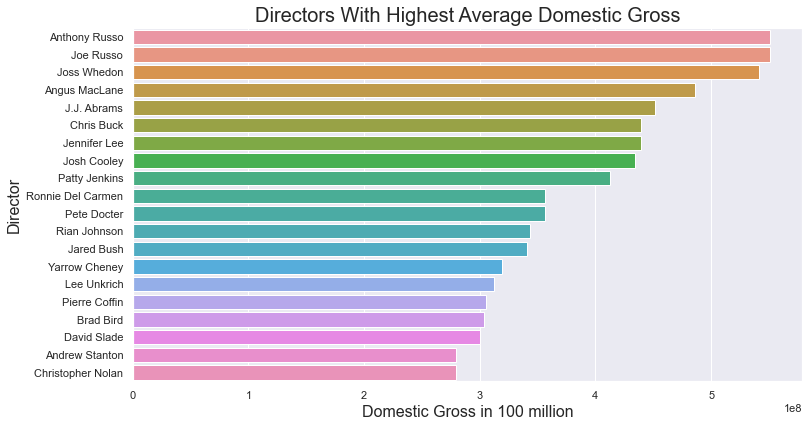

In [50]:
#graph domestic gross vs director
f, ax = plt.subplots(figsize=(12, 6.5))
sns.barplot(y= 'primary_name', x= 'avg_domgross',
                data=df, ax=ax)

ax.set_title('Directors With Highest Average Domestic Gross', fontsize = 20)
ax.set_ylabel('Director', fontsize = 16)
ax.set_xlabel('Domestic Gross in 100 million', fontsize = 16);


<div class= "alert alert-block alert-info"> We can see in the above table that the Russo brothers have made the highest Domestic Gross with their films. Thoughts to consider with this is that the Russo brothers usually work together and have directed the majority of the Avengers movies. Joss Whedon, Angus MacLane, J.J. Abrams, Chris Buck, and Jennifer Lee are also directors to take note of. When doing additional research you can see that these directors are known for a wide variety of genres. </div>

### Directors Average World Wide Gross

In [51]:
#join tables for world wide gross
df2 = pysqldf('''SELECT tconst, d.directors, 
                AVG(ww_gross) as avg_wwgross, primary_name
                FROM directors as d
                JOIN income_wwgross
                USING(tconst)
                JOIN Names as n
                ON d.directors = n.nconst
                GROUP BY d.directors
                ORDER BY avg_wwgross DESC
                LIMIT 20;''')
display(df2.head())
print("---" * 14)
df.info()

tconst  directors   avg_wwgross   primary_name
0  tt1843866  nm0751577  1.678470e+09  Anthony Russo
1  tt1843866  nm0751648  1.678470e+09      Joe Russo
2  tt0848228  nm0923736  1.460809e+09    Joss Whedon
3  tt2294629  nm0118333  1.365415e+09     Chris Buck
4  tt2294629  nm1601644  1.365415e+09   Jennifer Lee

------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
tconst          20 non-null object
directors       20 non-null object
avg_domgross    20 non-null float64
primary_name    20 non-null object
dtypes: float64(1), object(3)
memory usage: 768.0+ bytes


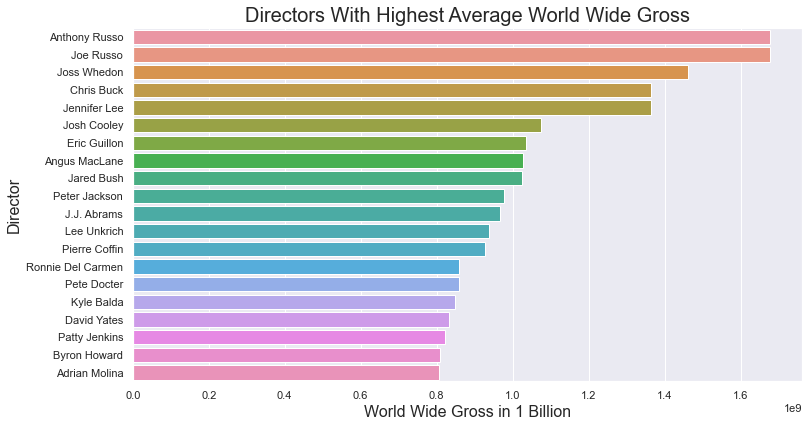

In [52]:
#graph world wide gross with directors
f, ax = plt.subplots(figsize=(12, 6.5))
sns.barplot(y= 'primary_name', x= 'avg_wwgross',
                data=df2, ax=ax)

ax.set_title('Directors With Highest Average World Wide Gross', fontsize = 20)
ax.set_ylabel('Director', fontsize = 16)
ax.set_xlabel('World Wide Gross in 1 Billion', fontsize = 16);

<div class = "alert alert-block alert-info"> By having two separate tables we are able to compare director's domestic gross vs. worldwide gross. Between the two tables we can observe many similarities and differences. The Russo brothers how the top gross domestically and worldwide, but moving down our list of directors we can see that Lee and Cooley's movies made more world wide gross than Abram's and MacLane. This is something to take note of when Microsoft chooses their directors and if they want to focus on domestic gross or worldwide gross.  </div>

<div class = "alert alert-block alert-success">
    
**Director Recommendations:**
    1. The Russo Brothers
    2. Joss Whedon
    3. Chris Buck
    4. Jennifer Lee
    
</div>

## Which genre will bring in the most money?

**Organizing Genre data**

In [53]:
#drop \\N from data tables
imdb_tbasics.drop(imdb_tbasics.loc[imdb_tbasics['genres'] == '\\N'].index, inplace=True)

/Users/laurenesser/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
#split the genres into sep rows 
imdb_tbasics['genres'] = imdb_tbasics['genres'].str.split(',')

/Users/laurenesser/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
#explode to place back in dt
imdb_tbasics = imdb_tbasics.explode('genres')

In [56]:
#make sure it worked
imdb_tbasics.head()

tconst titleType                   primaryTitle  \
8    tt0000009     movie                     Miss Jerry   
145  tt0000147     movie  The Corbett-Fitzsimmons Fight   
145  tt0000147     movie  The Corbett-Fitzsimmons Fight   
145  tt0000147     movie  The Corbett-Fitzsimmons Fight   
571  tt0000574     movie    The Story of the Kelly Gang   

                     originalTitle  isAdult startYear endYear runtimeMinutes  \
8                       Miss Jerry        0      1894      \N             45   
145  The Corbett-Fitzsimmons Fight        0      1897      \N             20   
145  The Corbett-Fitzsimmons Fight        0      1897      \N             20   
145  The Corbett-Fitzsimmons Fight        0      1897      \N             20   
571    The Story of the Kelly Gang        0      1906      \N             70   

          genres  
8        Romance  
145  Documentary  
145         News  
145        Sport  
571    Biography

The decision to split the genres above was to ensure that each genre was able to be visually shown. If I had a genre labeled "Romance, Comedy" it would be different than "Romance" or "Comedy". Therefore, by splitting the genres into separate rows I can easily differentiate between movies.

### Domestic vs. Worldwide Gross by Genre


In [57]:
dom_ww = pysqldf("""SELECT genres, AVG(gross) as avg_gross, AVG(ww_gross) as avg_wwgross
                            FROM income_domgross
                            JOIN imdb_tbasics
                            USING(tconst)
                            JOIN income_wwgross
                            USING(tconst)
                            GROUP BY genres;""")
display(dom_ww.head())
print("---" * 14)
dom_ww.info()

genres     avg_gross   avg_wwgross
0     Action  6.982239e+07  1.993517e+08
1  Adventure  1.111134e+08  3.243314e+08
2  Animation  1.042856e+08  2.911563e+08
3  Biography  2.331017e+07  5.174760e+07
4     Comedy  4.324142e+07  1.024258e+08

------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
genres         22 non-null object
avg_gross      22 non-null float64
avg_wwgross    22 non-null float64
dtypes: float64(2), object(1)
memory usage: 656.0+ bytes


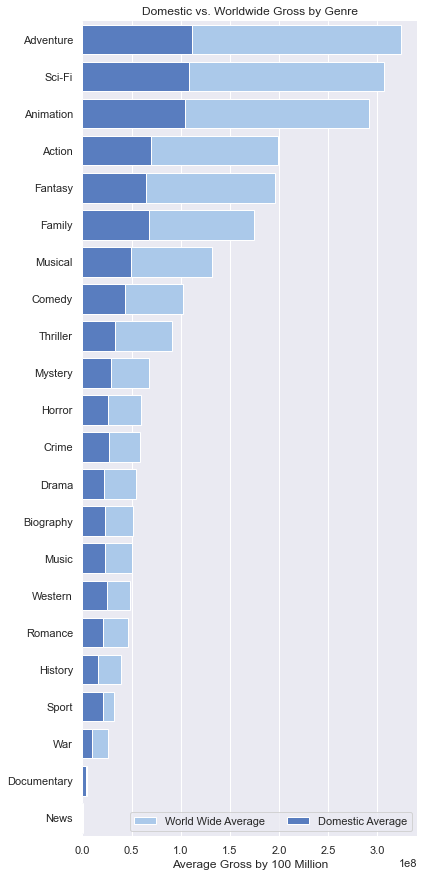

In [58]:
sns.set(style="darkgrid")

#create the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

dom_ww = dom_ww.sort_values("avg_wwgross", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="avg_wwgross", y="genres", data=dom_ww,
            label="World Wide Average", color="b")

sns.set_color_codes("muted")
sns.barplot(x="avg_gross", y="genres", data=dom_ww,
            label="Domestic Average", color="b")

#ddd a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Average Gross by 100 Million",
       title= "Domestic vs. Worldwide Gross by Genre")
sns.despine(left=True, bottom=True)

<div class = "alert alert-block alert-info"> Viewing the above graph we can see domestically and worldwide that adventure, science fiction, and animation would be the best genres to choose from. If focusing on domestic gross all of these options would be about equal. If Microsoft chooses to focus on worldwide gross I would recommend their first movie being adventure.</div>

<div class = "alert alert-block alert-success">

**Genre Selection:**
    1. Adventure
    2. Sci-Fi
    3. Animation
</div>

### Director Bubble Chart

In the bubble chart below I wanted to merge the above questions together and create an interactive in order to view directors and the specific movies they filmed. By hovering over the bubbles below you can view the movie's budget, net, ROI, title, genre, and audience rating. 

In [59]:
bubble = pysqldf('''SELECT tconst, genres, budget, t.primaryTitle,
                d.directors, t.startYear,
                gross, primary_name as name, averageRating
                FROM directors as d
                JOIN imdb_tbasics as t
                USING(tconst)
                JOIN imdb_ratings
                USING(tconst)
                JOIN income_domgross
                USING(tconst)
                JOIN Names as n
                ON d.directors = n.nconst
                ORDER BY gross DESC;''')
display(bubble.head())
print("---" * 14)
bubble.info()

tconst     genres       budget  \
0  tt2488496     Action  245000000.0   
1  tt2488496  Adventure  245000000.0   
2  tt2488496     Sci-Fi  245000000.0   
3  tt4154796     Action  356000000.0   
4  tt4154796  Adventure  356000000.0   

                                 primaryTitle  directors startYear  \
0  Star Wars: Episode VII - The Force Awakens  nm0009190      2015   
1  Star Wars: Episode VII - The Force Awakens  nm0009190      2015   
2  Star Wars: Episode VII - The Force Awakens  nm0009190      2015   
3                           Avengers: Endgame  nm0751577      2019   
4                           Avengers: Endgame  nm0751577      2019   

         gross           name  averageRating  
0  936662225.0    J.J. Abrams            7.9  
1  936662225.0    J.J. Abrams            7.9  
2  936662225.0    J.J. Abrams            7.9  
3  858373000.0  Anthony Russo            8.4  
4  858373000.0  Anthony Russo            8.4

------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6790 entries, 0 to 6789
Data columns (total 9 columns):
tconst           6790 non-null object
genres           6790 non-null object
budget           6790 non-null float64
primaryTitle     6790 non-null object
directors        6790 non-null object
startYear        6790 non-null object
gross            6790 non-null float64
name             6790 non-null object
averageRating    6790 non-null float64
dtypes: float64(3), object(6)
memory usage: 477.5+ KB


In [60]:
#finding domestic net
bubble['domestic_net'] = np.round(((bubble['gross']) - (bubble['budget'])),2)

In [61]:
#finding the ROI
bubble['ROI'] = np.round(((bubble['gross']) - (bubble['budget']))/(bubble['budget']),2)


In [62]:
#interactive scatter using merged tables
fig = px.scatter(bubble.head(50), x="budget", y="domestic_net", color="name", 
                 size = 'ROI', 
                 hover_data=['primaryTitle', 'genres', 'averageRating'], size_max=30, 
                 labels={'budget': 'Budget in Millions',
                        "domestic_net": 'Domestic Net in Millions',
                        'name': ' ',
                        'averageRating': 'Average Rating',
                        'primaryTitle': 'Movie Title',
                        'genres': 'Genre'},
                title="Director's Top Movies by Domestic Gross")
fig.show()


<div class="alert alert-block alert-info">
The above Bubble graph points out interesting data when looking at past movies. While Avengers Endgame may be the highest grossing movie of all time, it is important to note that Star Wars Episode VII actually has a higher ROI. This is something to consider when creating a movie. 
    </div>

### Genre's Gross by Year

In [63]:
#combining tables to pull genre, start year, gross
df6 = pysqldf('''SELECT genres, startYear, gross 
                  FROM income_domgross
                  JOIN imdb_tbasics
                  USING(tconst)
                  ORDER BY gross DESC;''')
display(df6.head())

genres startYear        gross
0     Action      2015  936662225.0
1  Adventure      2015  936662225.0
2     Sci-Fi      2015  936662225.0
3     Action      2019  858373000.0
4  Adventure      2019  858373000.0

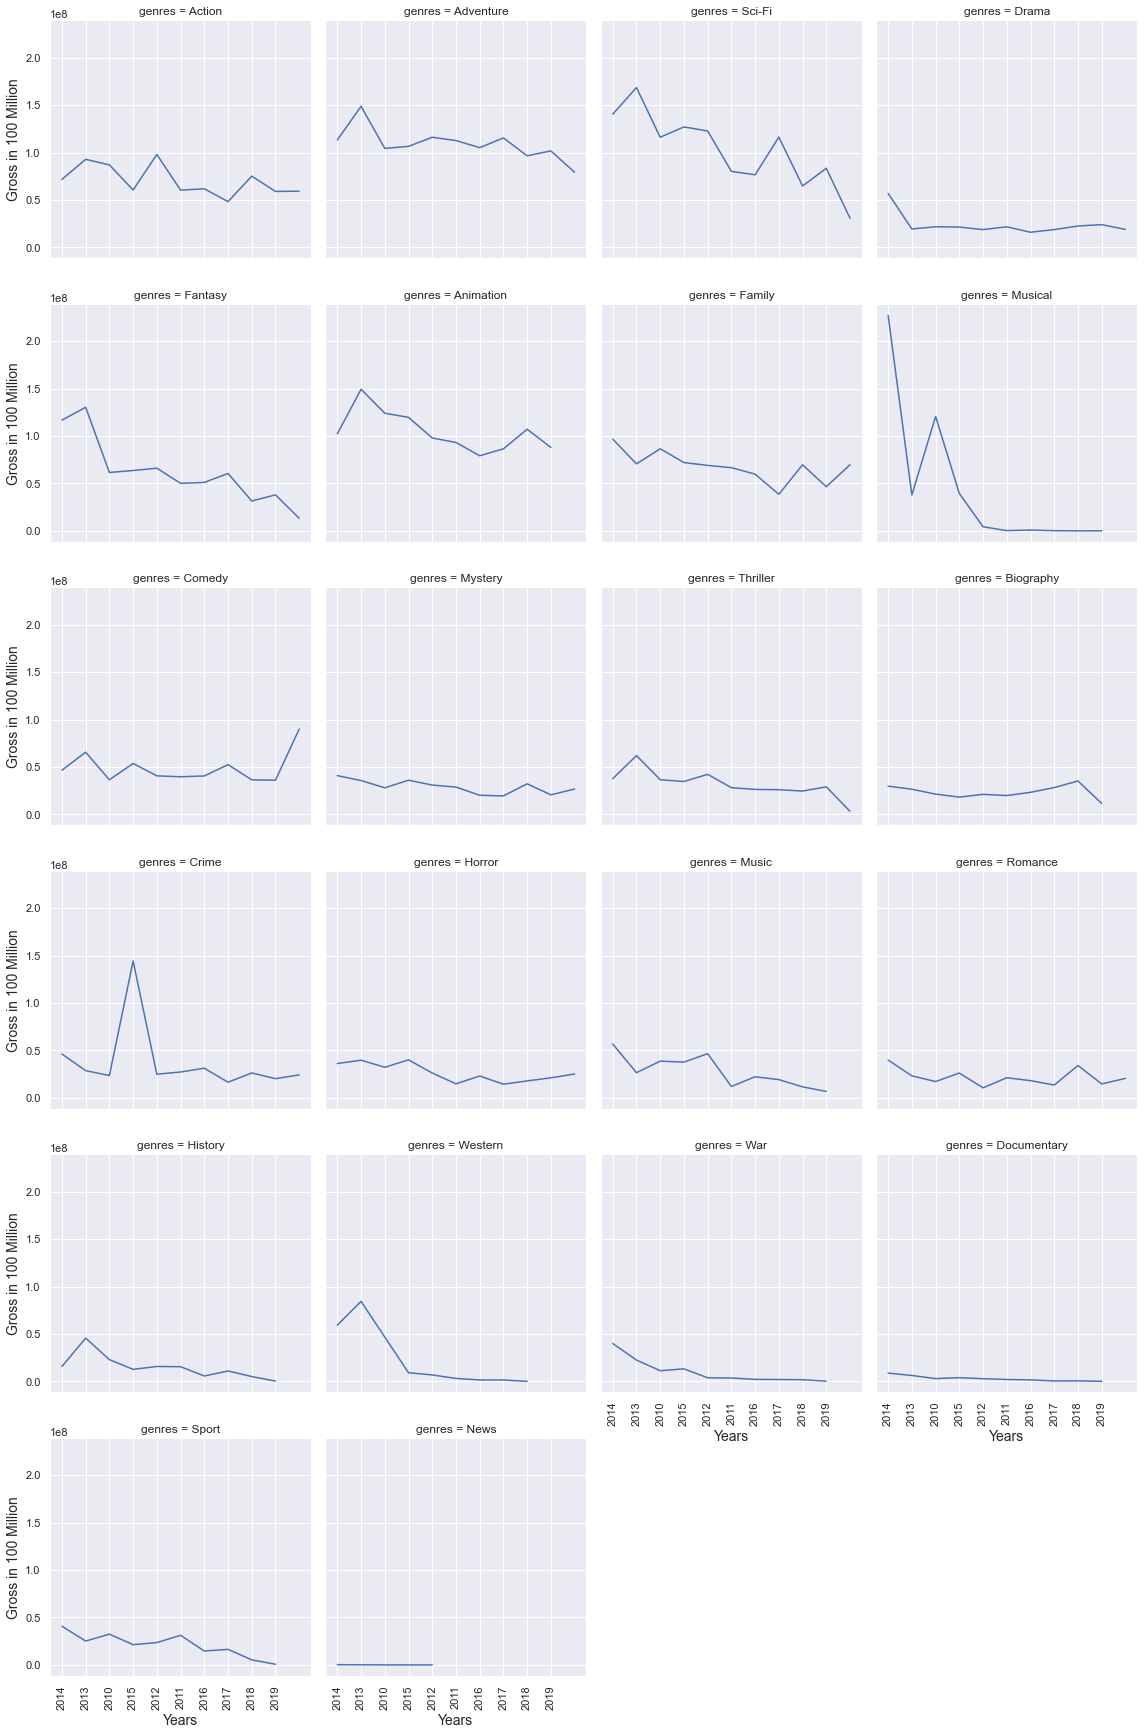

In [64]:
#create facetgrid to compare genres gross
g = sns.FacetGrid(df6, col="genres", col_wrap=4, height=4)
g.map(sns.lineplot, "startYear", "gross", ci=None);

#had to manually set xticks
g.set(xticks = ["2010","2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"])

#rotate xticks for better visualization
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
    ax.set_ylabel('Gross in 100 Million', fontsize= 14)
    ax.set_xlabel('Years', fontsize=14)


The above graphs allow us to compare how each specific genre has done over the past decade. Genre's such as crime and animation appear to be on the rise whereas Western and History continue to decline. 

<div class = "alert alert-block alert-success">
    
**Genre Recommendations:**
    1. Adventure
    2. Sci-Fi
    3. Animation
    4. Action
    5. Fantasy

</div>

## Does runtime make an impact on ratings?

### Creating a regression plot

In [65]:
#combining tables to pull tconst, runtime, and ratings
df1 = pysqldf('''SELECT tconst, runtimeMinutes, averageRating
                 FROM imdb_tbasics
                 JOIN imdb_ratings
                 USING(tconst);''')
display(df1.head())
print("---" * 14)
df1.info()

tconst runtimeMinutes  averageRating
0  tt0002130             71            7.0
1  tt0002130             71            7.0
2  tt0002130             71            7.0
3  tt0002844             54            7.0
4  tt0002844             54            7.0

------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72897 entries, 0 to 72896
Data columns (total 3 columns):
tconst            72897 non-null object
runtimeMinutes    72897 non-null object
averageRating     72897 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.7+ MB


In [66]:
#make runtime an integer
df1['runtimeMinutes'] = df1['runtimeMinutes'].astype(int)

In [67]:
#check to see if outliers are actual movies
#df1.loc[(df1['runtimeMinutes'] > 500) | (df1['runtimeMinutes'] < 40)]

Outliers are popular movies therefore they were left within the dataframe.

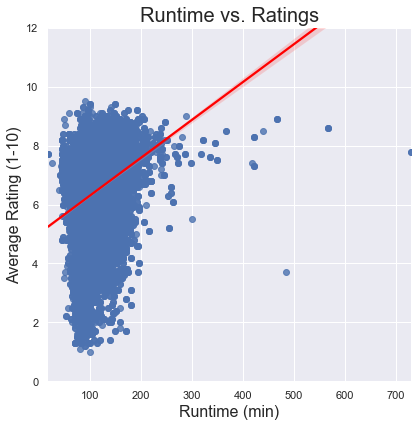

In [68]:
#create scatterplot modeling data
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.regplot(x= 'runtimeMinutes', y= 'averageRating',
                data=df1, ax=ax, line_kws = {'color':'red'})
ax.set_title('Runtime vs. Ratings', fontsize = 20)
ax.set_xlabel('Runtime (min)', fontsize = 16)
ax.set_ylabel('Average Rating (1-10)', fontsize = 16)
ax.set(ylim=(0, 12)); #Ratings only go to 10, but allows to see trend


<div class= "alert alert-block alert-info"> Looking at the Regression plot we are able to see there is a linear relationship between Runtime and Average Rating. On the right side of the graph we are able to see a couple of outliers, these movies are documentary's such as O.J. Simpson and popular movies from India that are many hours long. When choosing Runtime I would recommend staying in the 120-200 minute range.
    </div>

<div class = "alert alert-block alert-success">

**Runtime Recommendation:**

    120-200 minutes

### Runtime Boxplot and Displot

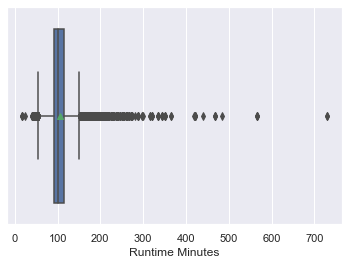

In [69]:
#boxplot in order to view median and mean runtime
ax = sns.boxplot(x=df1["runtimeMinutes"], showmeans = True)
ax.set_xlabel("Runtime Minutes");

/Users/laurenesser/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



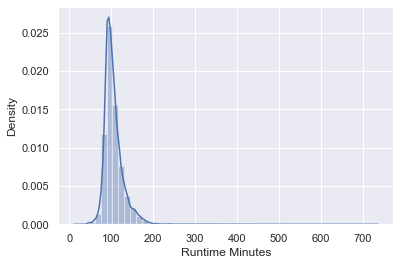

In [70]:
ax = sns.distplot(df1['runtimeMinutes'])
ax.set_xlabel("Runtime Minutes");

/Users/laurenesser/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



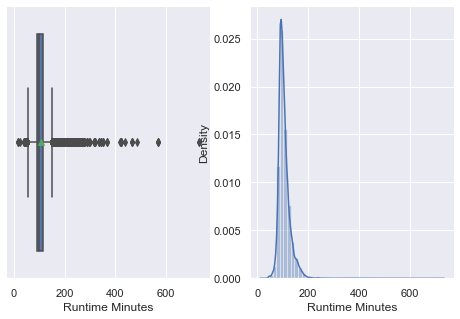

In [71]:
#putting the two together for better visualization
f, axes = plt.subplots(1, 2, figsize=(8, 5), sharex=True)
sns.despine(left=True)

ax = sns.boxplot(x=df1["runtimeMinutes"], showmeans = True, ax=axes[0])
ax1 = sns.distplot(df1['runtimeMinutes'], ax=axes[1])
ax.set_xlabel("Runtime Minutes")
ax1.set_xlabel("Runtime Minutes");

The boxplot on the left shows us that the median length of a movie is close to 100 minutes and the mean is close to 110.  The boxplot visualization allows us to see the outliers on each side of the dataset. I also chose to show Runtime using a displot because it allows for an easier visualization to see the distribution of runtime. 

# Interpretation

**1. Hire a good director:**
* Anthony Russo
* Joe Russo
* Joss Whedon
* Chris Buck
* Jennifer Lee

**2. Chose a popular genre:**
* Adventure
* Science Fiction
* Animation
* Action
* Fantasy


**3. For highest ratings keep your runtime between 120 and 200 minutes**

# Future Work

If given time for future work on this project I would love to look at:
1. Which actors will bring in the most revenue?
2. What time of year should we release our movies?
3. What rating (PG, PG-13, R) is the most profitable?
4. How should we advertise our movie for the most success?

Thank you.